In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Data (X) - Acidity of Milk  Data(Y)- Density of Milk

In [18]:
def readData(filename):
    df = pd.read_csv(filename)
    return df.values

x = readData('linearX.csv')
y = readData('linearY.csv')
x = x.reshape((99,))
y = y.reshape((99,))

In [21]:
print(x)
print(y)

[ 8.   9.1  8.4  6.9  7.7 15.6  7.3  7.   7.2 10.1 11.5  7.1 10.   8.9
  7.9  5.6  6.3  6.7 10.4  8.5  7.4  6.3  5.4  8.9  9.4  7.5 11.9  7.8
  7.4 10.8 10.2  6.2  7.7 13.7  8.   6.7  6.7  7.   8.3  7.4  9.9  6.1
  7.   5.4 10.7  7.6  8.9  9.2  6.6  7.2  8.   7.8  7.9  7.   7.   7.6
  9.1  9.   7.9  6.6 11.9  6.5  7.1  8.8  7.5  7.7  6.  10.6  6.6  8.2
  7.9  7.1  5.6  6.4  7.5  9.8  7.  10.5  7.1  6.2  6.5  7.7  7.2  9.3
  8.5  7.7  6.8  7.8  8.7  9.6  7.2  9.3  8.1  6.6  7.8 10.2  6.1  7.3
  7.3]
[0.99007 0.99769 0.99386 0.99508 0.9963  1.0032  0.99768 0.99584 0.99609
 0.99774 1.0003  0.99694 0.99965 0.99549 0.99364 0.99378 0.99379 0.99524
 0.9988  0.99733 0.9966  0.9955  0.99471 0.99354 0.99786 0.9965  0.9988
 0.9964  0.99713 0.9985  0.99565 0.99578 0.9976  1.0014  0.99685 0.99648
 0.99472 0.99914 0.99408 0.9974  1.0002  0.99402 0.9966  0.99402 1.0029
 0.99718 0.9986  0.9952  0.9952  0.9972  0.9976  0.9968  0.9978  0.9951
 0.99629 0.99656 0.999   0.99836 0.99396 0.99387 1.0004  0.99

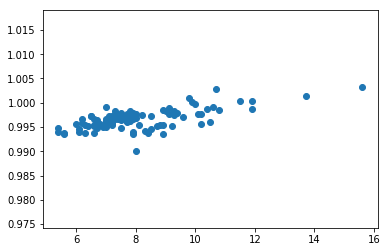

In [23]:
# Plot the data
plt.scatter(x,y)
plt.show()

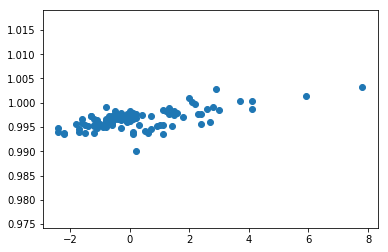

In [27]:
# Normalisation
x = x - x.mean()/(x.std())
plt.scatter(x,y)
plt.show()
X = x
Y = y

### Algorithm - Linear Regression

In [39]:
def hypothesis(theta,x):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    total_error = 0
    m = X.shape[0]
    
    for i in range(m):
        total_error += (Y[i] - hypothesis(theta,X[i]))**2
        
    return 0.5*total_error

def gradient(X,Y,theta):
    grad = np.array([0.0,0.0])
    m = X.shape[0]
    for i in range(m):
        grad[0] += -1*(Y[i] - hypothesis(theta,X[i]))
        grad[1] += -1*(Y[i] - hypothesis(theta,X[i]))*X[i]
    return grad

def gradientDescent(X,Y,learning_rate,maxItr):
    grad = np.array([0.0,0.0])
    theta = np.array([0.0,0.0])
    e = []
    
    for i in range(maxItr):
        grad = gradient(X,Y,theta)
        ce = error(X,Y,theta)
        print(ce)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        e.append(ce)
    
    return theta,e


theta,e = gradientDescent(X,Y,learning_rate = 0.001,maxItr=100)
print(theta[0],theta[1])

49.16754909500004
39.43339147632159
31.86699142642396
25.87075364840379
21.060560465530433
17.172804493964623
14.01632751048895
11.44661524362883
9.351210059321591
7.640927281464793
6.244190940840796
5.103135326476461
4.170771504954583
3.408841708702645
2.7861478342104453
2.277224924222223
1.8612760957301042
1.5213112531116386
1.2434475827162552
1.0163399708631096
0.8307165000433625
0.678999292416574
0.5549948517585894
0.45364108414258103
0.370800584037337
0.3030917058519146
0.24775050498667786
0.20251790299247094
0.16554746613849655
0.1353300305729921
0.11063209612373269
0.09044547339756108
0.07394612847958357
0.060460545117587874
0.049438231210452196
0.04042924726528168
0.03306583950351581
0.027047427858366013
0.022128336058689402
0.01810776293017243
0.014821585533752225
0.012135659538613267
0.009940343345574344
0.008146022431216277
0.0066794512129369705
0.005480763106987521
0.004501026727710101
0.0037002484701156024
0.0030457399396578793
0.0025107835864108725
0.0020735420737917607
0

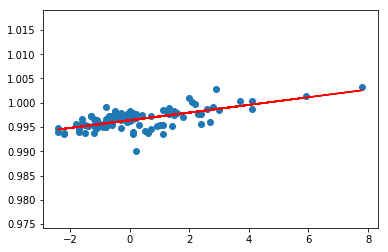

In [40]:
plt.scatter(X,Y)
plt.plot(X,hypothesis(theta,X),color='r')
plt.show()

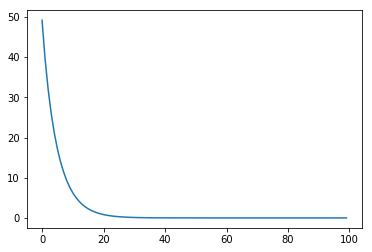

In [41]:
plt.plot(e)
plt.show()